In [ ]:
#This cell is used to try different input pre-processing methods.

import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow

img = cv2.imread('dataset/IRZ.png')
(rows,cols,ch)=img.shape

# Create a mask having 0's on pixels having colours equal to the background color.
# Background is assumed to be the color of the corner pixel
# This is mask is used to extract the non-background pixels of the image, then convert it to grayscale
masktf=(img==img[0,0].tolist())
masktf=(np.invert(np.all(masktf,axis=2))).astype(np.int)
mask=np.repeat(masktf[:,:,np.newaxis],3,axis=2)
maskedImg=np.asarray(img*mask,dtype=np.uint8)
grayImg = cv2.cvtColor(maskedImg, cv2.COLOR_BGR2GRAY)

# Use a 3x3 kernel to perform erosion over the images.
# This is performed to remove the line artifacts from the images.
# Eroded image is then adaptively thresholded and gaussian blurred to smooth it out.
kernel = np.ones((3,3),np.uint8)
erodedImg = cv2.erode(grayImg,kernel,iterations = 3)
thresholdedImg = cv2.adaptiveThreshold(erodedImg,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3,3)
blurredImg=cv2.GaussianBlur(thresholdedImg,(3,3),0)

# Edge detection is now performed over the obtained image.
# Canny edge detection algorithm is used.
# Obtained edges are then dilated and blurred for smoothing.
# Again erosion is performed for removing artifacts, and a copy is made for contouring.
edges = cv2.Canny(blurredImg,0,0)
edges = cv2.dilate(edges,kernel,iterations = 2)
edges=cv2.GaussianBlur(edges,(1,1),0)
edges=cv2.erode(edges,kernel,iterations = 2)
edged=edges.copy()

# Contouring is done in order to find the letters in the image.
# Contours are sorted in order of decreasing area, and the top 4 are selected.
# Only contours having area greater than 100 are retained from the top 4 to remove contours formed by artifacts
# Bounding boxes are formed around the contours of the identified letters, and are displayed.
contours,_=cv2.findContours(edged,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
contourList=sorted(contours,key=cv2.contourArea,reverse=True)[:4]
trueContours=list(filter(lambda x: cv2.contourArea(x)>100 , contourList))
plt.figure();
boundingRects=np.zeros((len(trueContours),4),dtype=np.uint)
boundedImg=edges.copy()
for i,j in zip(trueContours,np.arange(len(trueContours))):
    x,y,w,h= cv2.boundingRect(i)
    boundingRects[j]=[x,y,w,h]
    cv2.rectangle(boundedImg,(x,y),(x+w,y+h),(255,255,0),2)
boundingRects=boundingRects[boundingRects[:,0].argsort()]
plt.imshow(img),plt.show()
plt.imshow(boundedImg,cmap="gray"),plt.show()


# The letters corresponding to the bounding box regions are extracted from the image containing edges.
# The extracted alphabets are displayed
# The number of letters are also obtained in this way.
for alp in boundingRects:
    rx,ry,rw,rh=alp
    oneL=edges[ry:(ry+rh),rx:(rx+rw)]
    oneL=np.invert(oneL)
    oneL = cv2.resize(oneL,(64,64), interpolation = cv2.INTER_CUBIC)
    plt.imshow(oneL,cmap='gray'),plt.show()
print('Numbers of letters found = ' + str(len(trueContours)))

6008.5


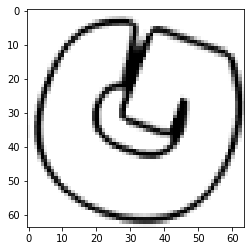

(<matplotlib.image.AxesImage at 0x7fe63168e390>, None)

In [4]:
# This cell is used to preprocess the reference alphabets for training.
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('reference/G.png')
(rows,cols,ch)=img.shape
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# The input image is rotated at different angles to generate training data for different angles of rotation
rotationAngle=70
rotationMatrix = cv2.getRotationMatrix2D((cols/2,rows/2),rotationAngle,1)
transformedImg = cv2.warpAffine(grayImg,rotationMatrix,(cols,rows),borderValue=(255,255,255))

# Edge detection is performed, followed by contouring
# The bounding box of the largest contour is selected, and the corresponding region is extracted.
edged=np.invert(transformedImg.copy())
contours, hierarchy=cv2.findContours(edged,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
trueContours=sorted(contours,key=cv2.contourArea,reverse=True)[:1]
print(cv2.contourArea(trueContours[0]))
x,y,w,h= cv2.boundingRect(trueContours[0])
extractedImg=transformedImg[y:(y+h),x:(x+w)]
kernel = np.ones((2,2),np.uint8)
dilatedImg = cv2.dilate(extractedImg,kernel,iterations = 2)
finalImg = cv2.resize(dilatedImg,(64,64), interpolation = cv2.INTER_CUBIC)
plt.imshow(finalImg,cmap='gray'),plt.show()

In [5]:
# Script to find the addresses of the reference images..
import glob
cv_img = []
for i,L in zip(np.arange(26),[chr(i) for i in range(ord('A'),ord('Z')+1)]):
    img='reference/'+L+'.png'
    print(img)
    n= cv2.imread(img)
    cv_img.append(n)
print(cv_img)


reference/A.png
reference/B.png
reference/C.png
reference/D.png
reference/E.png
reference/F.png
reference/G.png
reference/H.png
reference/I.png
reference/J.png
reference/K.png
reference/L.png
reference/M.png
reference/N.png
reference/O.png
reference/P.png
reference/Q.png
reference/R.png
reference/S.png
reference/T.png
reference/U.png
reference/V.png
reference/W.png
reference/X.png
reference/Y.png
reference/Z.png
[array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],


In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize
from collections import deque

def extractHOG(img):
    img=np.float32(img)/255.0
    dix = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
    diy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)
    mag, angle = cv2.cartToPolar(dix, diy, angleInDegrees=True)
    hist=np.zeros((8,8,9))
    for i in np.arange(64):
        for j in np.arange(64):
            hr=np.int32(np.floor(i/8))
            hc=np.int32(np.floor(j/8))
            ang=angle[i,j]%180
            bno=np.int32(np.floor(ang/20))
            nbno=(bno+1)%9
            rem=ang%20;
            w0=(20-rem)/20;
            w1=rem/20;
            hist[hr,hc,bno]+=w0*mag[i,j]
            hist[hr,hc,nbno]+=w1*mag[i,j]
    features=np.zeros((1764,))
    featidx=0
    for i in np.arange(7):
        for j in np.arange(7):
            tmp=np.zeros((36,))
            tmp[0:9]=np.array(hist[i,j,:])
            tmp[9:18]+=hist[i,j+1,:]
            tmp[18:27]+=hist[i+1,j,:]
            tmp[27:36]+=hist[i+1,j+1,:]
            normv=np.linalg.norm(tmp)
            if(normv!=0):
                tmp=tmp/normv
            features[featidx:featidx+36]=tmp;
            featidx+=36
                    
            
            
    return features
    
    


img = cv2.imread('reference/B.png')
(rows,cols,ch)=img.shape
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

M = cv2.getRotationMatrix2D((cols/2,rows/2),50,1)
gray = cv2.warpAffine(gray,M,(cols,rows),borderValue=(255,255,255))

edged=np.invert(gray.copy())
contours, hierarchy=cv2.findContours(edged,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
cnt=sorted(contours,key=cv2.contourArea,reverse=True)[:1]
contArea=cv2.contourArea(cnt[0])
x,y,w,h= cv2.boundingRect(cnt[0])
oneL=gray[y:(y+h),x:(x+w)]
kernel = np.ones((2,2),np.uint8)
oneL = cv2.dilate(oneL,kernel,iterations = 2)
oneL = cv2.resize(oneL,(64,64), interpolation = cv2.INTER_CUBIC)




features=extractHOG(oneL)
features=np.hstack((features,[contArea]))
print(features.shape)

(1765,)


In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize
from collections import deque
import glob

def extractHOG(img):
    img=np.float32(img)/255.0
    dix = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
    diy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)
    mag, angle = cv2.cartToPolar(dix, diy, angleInDegrees=True)
    hist=np.zeros((8,8,9))
    for i in np.arange(64):
        for j in np.arange(64):
            hr=np.int32(np.floor(i/8))
            hc=np.int32(np.floor(j/8))
            ang=angle[i,j]%180
            bno=np.int32(np.floor(ang/20))
            nbno=(bno+1)%9
            rem=ang%20;
            w0=(20-rem)/20;
            w1=rem/20;
            hist[hr,hc,bno]+=w0*mag[i,j]
            hist[hr,hc,nbno]+=w1*mag[i,j]
    features=np.zeros((1764,))
    featidx=0
    for i in np.arange(7):
        for j in np.arange(7):
            tmp=np.zeros((36,))
            tmp[0:9]=np.array(hist[i,j,:])
            tmp[9:18]+=hist[i,j+1,:]
            tmp[18:27]+=hist[i+1,j,:]
            tmp[27:36]+=hist[i+1,j+1,:]
            normv=np.linalg.norm(tmp)
            if(normv!=0):
                tmp=tmp/normv
            features[featidx:featidx+36]=tmp;
            featidx+=36       
    return features



path = glob.glob("dataset/*.png")
trainData=[]
for imgname in path:
    alphList=list((imgname.split('/')[1]).split('.')[0]) 
    
    img = cv2.imread(imgname)
    (rows,cols,ch)=img.shape
    masktf=(img==img[0,0].tolist())
    masktf=(np.invert(np.all(masktf,axis=2))).astype(np.int)
    mask=np.repeat(masktf[:,:,np.newaxis],3,axis=2)
    nbimg=np.asarray(img*mask,dtype=np.uint8)
    gray = cv2.cvtColor(nbimg, cv2.COLOR_BGR2GRAY)
    kernel = np.ones((3,3),np.uint8)
    erosion = cv2.erode(gray,kernel,iterations = 3)
    ret3,th3 = cv2.threshold(erosion,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    th3=cv2.GaussianBlur(th3,(1,1),0)
    edges = cv2.Canny(th3,0,0)
    edges = cv2.dilate(edges,kernel,iterations = 2)
    edges=cv2.GaussianBlur(edges,(1,1),0)
    edges=cv2.erode(edges,kernel,iterations = 1)
    edged=edges.copy()
    contours, hierarchy=cv2.findContours(edged,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    im2=np.zeros(edged.shape,np.uint8)
    cnt=sorted(contours,key=cv2.contourArea,reverse=True)[:4]
    cnt=list(filter(lambda x: cv2.contourArea(x)>100 , cnt))
    testArr=np.zeros((len(cnt),4),dtype=np.uint)
    areaArr=np.zeros((len(cnt),),dtype=np.float32)
    for i,j in zip(cnt,np.arange(len(cnt))):
        x,y,w,h= cv2.boundingRect(i)
        testArr[j]=[x,y,w,h]
        areaArr[j]=cv2.contourArea(i)
        im3 = cv2.rectangle(edges,(x,y),(x+w,y+h),(255,255,0),2)
    order=testArr[:,0].argsort()
    testArr=testArr[order]
    areaArr=areaArr[order]
    for alp,arr,ltr in zip(testArr,areaArr,alphList):
        rx,ry,rw,rh=alp
        oneL=edges[ry:(ry+rh),rx:(rx+rw)]
        oneL=np.invert(oneL)
        oneL = cv2.resize(oneL,(64,64), interpolation = cv2.INTER_CUBIC)
        feat=extractHOG(oneL)
        tdPoint=np.hstack((feat,[arr],[ord(ltr)-ord('A')]))
        trainData.append(tdPoint)
        
path = glob.glob("reference/*.png")
features=[]
for imgname in path:
    ltr=ord((imgname.split('/')[1]).split('.')[0])-ord('A')
    ulim=50
    llim=-40
    if (ltr+ord('A'))==ord('Z') or (ltr+ord('A'))==ord('N'):
        ulim=30
        llim=-20
    img = cv2.imread(imgname)
    (rows,cols,ch)=img.shape
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    for deg in range(llim,ulim,10):
        M = cv2.getRotationMatrix2D((cols/2,rows/2),deg,1)
        gray = cv2.warpAffine(gray,M,(cols,rows),borderValue=(255,255,255))
        edged=np.invert(gray.copy())
        contours, hierarchy=cv2.findContours(edged,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
        cnt=sorted(contours,key=cv2.contourArea,reverse=True)[:1]
        contArea=cv2.contourArea(cnt[0])
        x,y,w,h= cv2.boundingRect(cnt[0])
        oneL=gray[y:(y+h),x:(x+w)]
        kernel = np.ones((2,2),np.uint8)
        oneL = cv2.dilate(oneL,kernel,iterations = 2)
        oneL = cv2.resize(oneL,(64,64), interpolation = cv2.INTER_CUBIC)
        feat=extractHOG(oneL)
        tdPoint=np.hstack((feat,[contArea],[ltr]))
        trainData.append(tdPoint)
print(np.array(trainData).shape)
np.savetxt('newDataset.out', np.array(trainData), delimiter=',') 

(7234, 1766)


In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=4, random_state=0)
print(X.shape)

In [ ]:
import numpy as np
from sklearn.svm import LinearSVC
import pickle 
import cv2
from matplotlib import pyplot as plt
import glob

# Implementation of calculating Histogram of Gradients(HoG) as features from the training images
def extractHOG(img):
    img=np.float32(img)/255.0
    dix = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
    diy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)
    mag, angle = cv2.cartToPolar(dix, diy, angleInDegrees=True)
    hist=np.zeros((8,8,9))
    for i in np.arange(64):
        for j in np.arange(64):
            hr=np.int32(np.floor(i/8))
            hc=np.int32(np.floor(j/8))
            ang=angle[i,j]%180
            bno=np.int32(np.floor(ang/20))
            nbno=(bno+1)%9
            rem=ang%20;
            w0=(20-rem)/20;
            w1=rem/20;
            hist[hr,hc,bno]+=w0*mag[i,j]
            hist[hr,hc,nbno]+=w1*mag[i,j]
    features=np.zeros((1764,))
    featidx=0
    for i in np.arange(7):
        for j in np.arange(7):
            tmp=np.zeros((36,))
            tmp[0:9]=np.array(hist[i,j,:])
            tmp[9:18]+=hist[i,j+1,:]
            tmp[18:27]+=hist[i+1,j,:]
            tmp[27:36]+=hist[i+1,j+1,:]
            normv=np.linalg.norm(tmp)
            if(normv!=0):
                tmp=tmp/normv
            features[featidx:featidx+36]=tmp;
            featidx+=36       
    return features



def decaptcha( filenames ):
    clf = pickle.load(open('final_submit/model_rf_26', 'rb'))
    numChars=[]
    codes=[]
    for imgname in filenames:
        img = cv2.imread(imgname)
        (rows,cols,ch)=img.shape
        masktf=(img==img[0,0].tolist())
        masktf=(np.invert(np.all(masktf,axis=2))).astype(np.int)
        mask=np.repeat(masktf[:,:,np.newaxis],3,axis=2)
        nbimg=np.asarray(img*mask,dtype=np.uint8)
        gray = cv2.cvtColor(nbimg, cv2.COLOR_BGR2GRAY)
        kernel = np.ones((3,3),np.uint8)
        erosion = cv2.erode(gray,kernel,iterations = 3)
        ret3,th3 = cv2.threshold(erosion,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        th3=cv2.GaussianBlur(th3,(1,1),0)
        edges = cv2.Canny(th3,0,0)
        edges = cv2.dilate(edges,kernel,iterations = 2)
        edges=cv2.GaussianBlur(edges,(1,1),0)
        edges=cv2.erode(edges,kernel,iterations = 1)
        edged=edges.copy()
        _, contours, hierarchy=cv2.findContours(edged,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
        im2=np.zeros(edged.shape,np.uint8)
        cnt=sorted(contours,key=cv2.contourArea,reverse=True)[:4]
        cnt=list(filter(lambda x: cv2.contourArea(x)>100 , cnt))
        testArr=np.zeros((len(cnt),4),dtype=np.uint)
        areaArr=np.zeros((len(cnt),),dtype=np.float32)
        for i,j in zip(cnt,np.arange(len(cnt))):
            x,y,w,h= cv2.boundingRect(i)
            testArr[j]=[x,y,w,h]
            areaArr[j]=cv2.contourArea(i)
            im3 = cv2.rectangle(edges,(x,y),(x+w,y+h),(255,255,0),2)
        order=testArr[:,0].argsort()
        testArr=testArr[order]
        areaArr=areaArr[order]
        alphs=[]
        for alp,arr in zip(testArr,areaArr):
            rx,ry,rw,rh=alp
            oneL=edges[ry:(ry+rh),rx:(rx+rw)]
            oneL=np.invert(oneL)
            oneL = cv2.resize(oneL,(64,64), interpolation = cv2.INTER_CUBIC)
            feat=extractHOG(oneL)
            tdPoint=np.array(np.hstack((feat,[arr])))
            ch=clf.predict([tdPoint])
            ch=ch+ord('A')
            print(ch)
            plt.imshow(oneL,cmap='gray'),plt.show()
            alphs.append(chr(ch))
        numChars.append(len(cnt))
        code=''.join(alphs)
        codes.append(code)
    numChars=np.array(numChars)
    return (numChars, codes)

filenames=list(['/image1.png','test/image2.png'])
print(decaptcha(filenames))

In [ ]:
import numpy as np
from sklearn.svm import LinearSVC
import pickle 

data=np.genfromtxt('trial.out',delimiter=',', dtype= np.float32)
X=data[:,:-1]
Y=np.int32(data[:,-1])
clf = LinearSVC(random_state=0)
clf.fit(X,Y)

filename = 'model'
pickle.dump(clf, open(filename, 'wb'))



In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


img = cv2.imread('train/BYHO.png')
(rows,cols,ch)=img.shape
masktf=(img==img[0,0].tolist())
masktf=(np.invert(np.all(masktf,axis=2))).astype(np.int)
mask=np.repeat(masktf[:,:,np.newaxis],3,axis=2)
nbimg=np.asarray(img*mask,dtype=np.uint8)
gray = cv2.cvtColor(nbimg, cv2.COLOR_BGR2GRAY)
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(gray,kernel,iterations = 3)
ret3,th3 = cv2.threshold(erosion,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th3,cmap="gray")
th3=cv2.GaussianBlur(th3,(3,3),0)
edges = cv2.Canny(th3,0,0)
edges = cv2.dilate(edges,kernel,iterations = 2)
edges=cv2.GaussianBlur(edges,(1,1),0)
edges=cv2.erode(edges,kernel,iterations = 1)
edged=edges.copy()
contours, hierarchy=cv2.findContours(edged,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
im2=np.zeros(edged.shape,np.uint8)
cnt=sorted(contours,key=cv2.contourArea,reverse=True)[:4]
cnt=list(filter(lambda x: cv2.contourArea(x)>1000 , cnt))
plt.figure();
testArr=np.zeros((len(cnt),4),dtype=np.uint)
for i,j in zip(cnt,np.arange(len(cnt))):
    x,y,w,h= cv2.boundingRect(i)
    #print(x,y,w,h)
    testArr[j]=[x,y,w,h]
    #x,y,w,h = cv2.boundingRect(np.array(contours,dtype=np.uint8))
    im3 = cv2.rectangle(edges,(x,y),(x+w,y+h),(255,255,0),2)
    #plt.imshow(im3,cmap="gray"),plt.show()
#     print(cv2.contourArea(i))
testArr=testArr[testArr[:,0].argsort()]
plt.imshow(img),plt.show()
plt.imshow(im3,cmap="gray"),plt.show()



image = cv2.imread("test.jpg",0)
winSize = (64,64)
blockSize = (16,16)
blockStride = (8,8)
cellSize = (8,8)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64
hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                        histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
#compute(img[, winStride[, padding[, locations]]]) -> descriptors
winStride = (8,8)
padding = (8,8)
locations = ((10,20),)

histo=[]
for alp in testArr:
    rx,ry,rw,rh=alp
    #print(rx,ry,rw,rh)
    oneL=edges[ry:(ry+rh),rx:(rx+rw)]
    oneL=np.invert(oneL)
    oneL = cv2.resize(oneL,(64,64), interpolation = cv2.INTER_CUBIC)
    hist = hog.compute(image,winStride,padding,locations)
    histo.append(hist)
    plt.imshow(oneL,cmap='gray'),plt.show()
print('Numbers of letters found = ' + str(len(cnt)))



In [ ]:
from captcha.image import ImageCaptcha  # pip install captcha
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

number = ['0','1','2','3','4','5','6','7','8','9']
MAX_CAPTCHA = 6
WIDTH=100
HEIGHT=30

image = ImageCaptcha(width=WIDTH, height=HEIGHT, font_sizes=[30])

captcha_text = []
for i in range(MAX_CAPTCHA):
    c = random.choice(number)
    captcha_text.append(c)
    #print(captcha_text)
captcha_text = ''.join(captcha_text)
print(captcha_text)

captcha = image.generate(captcha_text)
captcha_image = Image.open(captcha)
captcha_image = np.array(captcha_image)

#image.write(captcha_text, str(i)+'_'+captcha_text + '.png') 
plt.imshow(captcha_image)
plt.show()  

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize
from collections import deque
import glob

path = glob.glob("train/*.png")
i=0
codefile=open("mytests/codes.txt",'w')
for imgname in path:
    img=cv2.imread(imgname)
    newpath='mytests/image%d'%i+'.png'
    i+=1
    cv2.imwrite(newpath,img)
    codefile.write(((imgname.split('/'))[1]).split('.')[0] + '\n')
codefile.close()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
import pickle 

data=np.genfromtxt('data.out',delimiter=',', dtype= np.float32)
X=data[:,:-1]
Y=np.int32(data[:,-1])
clf = RandomForestClassifier(n_estimators=10, max_depth=4,random_state=0)
clf.fit(X,Y)

filename = 'model_rf'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
from skimage.feature import hog
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize
from collections import deque
import glob




path = glob.glob("train/*.png")
trainData=[]
for imgname in path:
    alphList=list((imgname.split('/')[1]).split('.')[0]) 
    
    img = cv2.imread(imgname)
    (rows,cols,ch)=img.shape
    masktf=(img==img[0,0].tolist())
    masktf=(np.invert(np.all(masktf,axis=2))).astype(np.int)
    mask=np.repeat(masktf[:,:,np.newaxis],3,axis=2)
    nbimg=np.asarray(img*mask,dtype=np.uint8)
    gray = cv2.cvtColor(nbimg, cv2.COLOR_BGR2GRAY)
    kernel = np.ones((3,3),np.uint8)
    erosion = cv2.erode(gray,kernel,iterations = 3)
    ret3,th3 = cv2.threshold(erosion,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    th3=cv2.GaussianBlur(th3,(1,1),0)
    edges = cv2.Canny(th3,0,0)
    edges = cv2.dilate(edges,kernel,iterations = 2)
    edges=cv2.GaussianBlur(edges,(1,1),0)
    edges=cv2.erode(edges,kernel,iterations = 1)
    edged=edges.copy()
    _, contours, hierarchy=cv2.findContours(edged,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    im2=np.zeros(edged.shape,np.uint8)
    cnt=sorted(contours,key=cv2.contourArea,reverse=True)[:4]
    cnt=list(filter(lambda x: cv2.contourArea(x)>1000 , cnt))
    testArr=np.zeros((len(cnt),4),dtype=np.uint)
    areaArr=np.zeros((len(cnt),),dtype=np.float32)
    for i,j in zip(cnt,np.arange(len(cnt))):
        x,y,w,h= cv2.boundingRect(i)
        testArr[j]=[x,y,w,h]
        areaArr[j]=cv2.contourArea(i)
    order=testArr[:,0].argsort()
    testArr=testArr[order]
    areaArr=areaArr[order]
    for alp,arr,ltr in zip(testArr,areaArr,alphList):
        rx,ry,rw,rh=alp
        oneL=edges[ry:(ry+rh),rx:(rx+rw)]
        oneL=np.invert(oneL)
        oneL = cv2.resize(oneL,(64,64), interpolation = cv2.INTER_CUBIC)
        feat, _ = hog(oneL, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)
        tdPoint=np.hstack((feat,[arr],[ord(ltr)-ord('A')]))
        trainData.append(tdPoint)
        
path = glob.glob("reference/*.png")
features=[]
for imgname in path:
    ltr=ord((imgname.split('/')[1]).split('.')[0])-ord('A')
    ulim=50
    llim=-40
    if (ltr+ord('A'))==ord('Z') or (ltr+ord('A'))==ord('N'):
        ulim=30
        llim=-20
    img = cv2.imread(imgname)
    (rows,cols,ch)=img.shape
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    for deg in range(llim,ulim,10):
        M = cv2.getRotationMatrix2D((cols/2,rows/2),deg,1)
        gray = cv2.warpAffine(gray,M,(cols,rows),borderValue=(255,255,255))
        edged=np.invert(gray.copy())
        contours, hierarchy=cv2.findContours(edged,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
        cnt=sorted(contours,key=cv2.contourArea,reverse=True)[:1]
        contArea=cv2.contourArea(cnt[0])
        x,y,w,h= cv2.boundingRect(cnt[0])
        oneL=gray[y:(y+h),x:(x+w)]
        kernel = np.ones((2,2),np.uint8)
        oneL = cv2.dilate(oneL,kernel,iterations = 2)
        oneL = cv2.resize(oneL,(64,64), interpolation = cv2.INTER_CUBIC)
        #feat=extractHOG(oneL)
        feat, hog_image = hog(oneL, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)
        tdPoint=np.hstack((feat,[contArea],[ltr]))
        trainData.append(tdPoint)
        
np.savetxt('data_hog.out', np.array(trainData), delimiter=',')

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import pickle 
import cv2
from matplotlib import pyplot as plt
import glob
from skimage.feature import hog


def decaptcha( filenames ):
    clf = pickle.load(open('submit_try_3/model_rf_10_none', 'rb'))
    numChars=[]
    codes=[]
    cv_img=[]
    for imgname in filenames:
        img = cv2.imread(imgname)
        cv_img.append(img)
    for img in cv_img:
        (rows,cols,ch)=img.shape
        masktf=(img==img[0,0].tolist())
        masktf=(np.invert(np.all(masktf,axis=2))).astype(np.int)
        mask=np.repeat(masktf[:,:,np.newaxis],3,axis=2)
        nbimg=np.asarray(img*mask,dtype=np.uint8)
        gray = cv2.cvtColor(nbimg, cv2.COLOR_BGR2GRAY)
        kernel = np.ones((3,3),np.uint8)
        erosion = cv2.erode(gray,kernel,iterations = 3)
        ret3,th3 = cv2.threshold(erosion,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        th3=cv2.GaussianBlur(th3,(1,1),0)
        edges = cv2.Canny(th3,0,0)
        edges = cv2.dilate(edges,kernel,iterations = 2)
        edges=cv2.GaussianBlur(edges,(1,1),0)
        edges=cv2.erode(edges,kernel,iterations = 1)
        edged=edges.copy()
        contours, hierarchy=cv2.findContours(edged,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
        im2=np.zeros(edged.shape,np.uint8)
        cnt=sorted(contours,key=cv2.contourArea,reverse=True)[:4]
        cnt=list(filter(lambda x: cv2.contourArea(x)>1000 , cnt))
        testArr=np.zeros((len(cnt),4),dtype=np.uint)
        areaArr=np.zeros((len(cnt),),dtype=np.float32)
        for i,j in zip(cnt,np.arange(len(cnt))):
            x,y,w,h= cv2.boundingRect(i)
            testArr[j]=[x,y,w,h]
            areaArr[j]=cv2.contourArea(i)
            im3 = cv2.rectangle(edges,(x,y),(x+w,y+h),(255,255,0),2)
        order=testArr[:,0].argsort()
        testArr=testArr[order]
        areaArr=areaArr[order]
        alphs=[]
        codeList=[]
        for alp,arr in zip(testArr,areaArr):
            rx,ry,rw,rh=alp
            oneL=edges[ry:(ry+rh),rx:(rx+rw)]
            oneL=np.invert(oneL)
            oneL = cv2.resize(oneL,(64,64), interpolation = cv2.INTER_CUBIC)
            feat, _ = hog(oneL, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)
            codeList.append(np.array(np.hstack((feat,[arr]))))
            ch=clf.predict(codeList)
        numChars.append(len(cnt))
        ch[:]+=ord('A')
        ch=[chr(ch[i]) for i in np.arange(len(ch))]
        code=''.join(ch)
        codes.append(code)
    numChars=np.array(numChars)
    return (numChars, codes)

filenames=list(['test/image1.png','test/image2.png'])
print(decaptcha(filenames))